In [119]:
# import dependencies
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np

trialfile = os.path.join('raw_data', 'clinicaltrial_data.csv')
mousefile = os.path.join('raw_data', 'mouse_drug_data.csv')
trial = pd.read_csv(trialfile)
mouse = pd.read_csv(mousefile)

merged = trial.merge(mouse, on='Mouse ID', how='inner')
merged.describe()

,Timepoint,Tumor Volume (mm3),Metastatic Sites
count,1906.000000,1906.000000,1906.000000
mean,19.538300,50.468120,1.018363
std,14.064786,8.869571,1.135991
min,0.000000,22.050126,0.000000
25%,5.000000,45.000000,0.000000
50%,20.000000,48.991921,1.000000
75%,30.000000,56.288484,2.000000
max,45.000000,78.567014,4.000000


In [69]:
# Creating a scatter plot that shows how the tumor volume changes over time for each treatment.
# * Creating a scatter plot that shows how the number of [metastatic](https://en.wikipedia.org/wiki/Metastasis) (cancer spreading) sites changes over time for each treatment.
# * Creating a scatter plot that shows the number of mice still alive through the course of treatment (Survival Rate)
# * Creating a bar graph that compares the total % tumor volume change for each drug across the full 45 days.


In [141]:
drug_id_group = merged.groupby(["Drug", "Timepoint"])
drug_id_group.count().head()

Mouse ID  Tumor Volume (mm3)  Metastatic Sites
Drug      Timepoint                                                
Capomulin 0                25                  25                25
          5                25                  25                25
          10               25                  25                25
          15               24                  24                24
          20               23                  23                23

In [142]:
group_means = pd.DataFrame(drug_id_group['Tumor Volume (mm3)'].mean())
group_means.head()

Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                   45.000000
          5                   44.266086
          10                  43.084291
          15                  42.064317
          20                  40.716325

In [148]:
tumor_values = group_means.reset_index()
tumor_values.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [155]:
tumor_values_pivot = tumor_values.pivot(index='Timepoint', columns = "Drug")['Tumor Volume (mm3)'] 
tumor_values_pivot_sem = pd.DataFrame(drug_id_group['Tumor Volume (mm3)'].sem()).reset_index()
# tumor_values_pivot_sem

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731
5,Capomulin,25,0.881642
6,Capomulin,30,0.934460
7,Capomulin,35,1.052241
8,Capomulin,40,1.223608
9,Capomulin,45,1.223977


Text(0,0.5,'Tumor Volume')

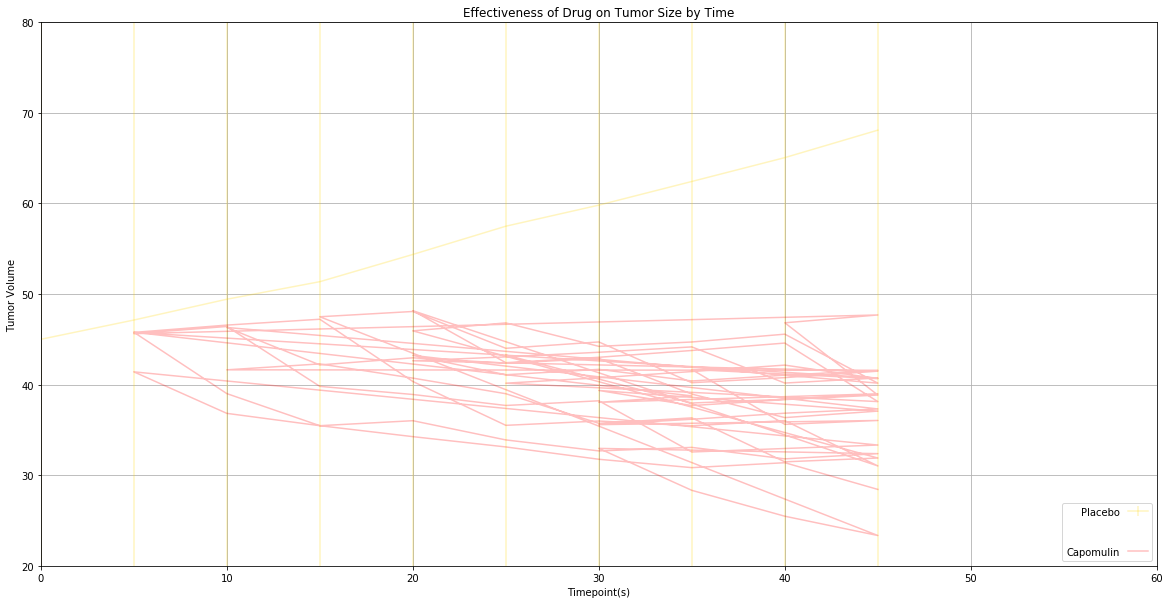

In [151]:
plt.figure(figsize=(20,10))
plt.xlim(0, 60)
plt.ylim(20,80)

#placebo tumor size over time by drug plot
plt.errorbar(tumor_values_pivot.index, tumor_values_pivot['Placebo'], yerr=tumor_values_pivot['Placebo'], c='Gold',  alpha=0.25, label = "Placebo")
#zoniferol
# plt.errorbar(zoniferol_time, zoniferol_volume, c='Blue',  alpha=0.25, label = "Zoniferol")
#naftisol
# plt.errorbar(naftisol_time, naftisol_volume, c='Red', alpha=0.25, label = "Naftisol")
#naftisol
plt.errorbar(capomulin_time, capomulin_volume, c='Red',alpha=0.25, label = "Capomulin")

plt.legend(loc='lower right', labelspacing=3, markerfirst=False, scatteryoffsets=[.5], markerscale=.5)

plt.grid(True)
plt.title('Effectiveness of Drug on Tumor Size by Time')
plt.xlabel("Timepoint(s)")
plt.ylabel("Tumor Volume")